In [68]:
import numpy as np
import matplotlib.pyplot as plt

Fungsi keanggotaan untuk suhu ruangan

In [70]:
def dingin(x):
    return np.where(x <= 16, 1, np.where(x <= 22, (22 - x) / (22 - 16), 0))

def sedang_suhu(x):
    return np.where(x <= 18, 0, np.where(x <= 26, (x - 18) / (26 - 18),
                  np.where(x <= 30, (30 - x) / (30 - 26), 0)))

def panas(x):
    return np.where(x <= 28, 0, np.where(x <= 40, (x - 28) / (40 - 28), 1))

Fungsi keanggotaan untuk kelembapan

In [72]:
def rendah(x):
    return np.where(x <= 10, 1, np.where(x <= 25, (25 - x) / (25 - 10), 0))

def sedang_kelembapan(x):
    return np.where(x <= 20, 0, np.where(x <= 35, (x - 20) / (35 - 20),
                  np.where(x <= 50, (50 - x) / (50 - 35), 0)))

def tinggi(x):
    return np.where(x <= 40, 0, np.where(x <= 50, (x - 40) / (50 - 40), 1))

# Fungsi keanggotaan untuk kecepatan kipas
def lambat(x):
    return np.where(x <= 16, 1, np.where(x <= 23, (23 - x) / (23 - 16), 0))

def sedang_kipas(x):
    return np.where(x <= 20, 0, np.where(x <= 27, (x - 20) / (27 - 20),
                  np.where(x <= 30, (30 - x) / (30 - 27), 0)))

def cepat(x):
    return np.where(x <= 28, 0, np.where(x <= 30, (x - 28) / (30 - 28), 1))

Domain untuk variabel linguistik

In [75]:
x_suhu = np.linspace(16, 40, 100)
x_kelembapan = np.linspace(0, 50, 100)
x_kecepatan = np.linspace(16, 30, 100)

Visualisasi fungsi keanggotaan

In [78]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Suhu Ruangan

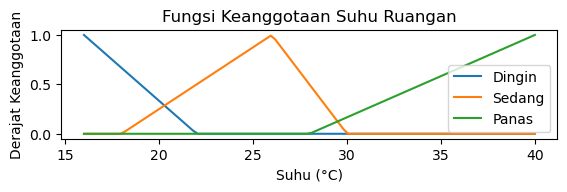

In [80]:
plt.subplot(3, 1, 1)
plt.plot(x_suhu, dingin(x_suhu), label="Dingin")
plt.plot(x_suhu, sedang_suhu(x_suhu), label="Sedang")
plt.plot(x_suhu, panas(x_suhu), label="Panas")
plt.title("Fungsi Keanggotaan Suhu Ruangan")
plt.xlabel("Suhu (°C)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
     

Kelembapan

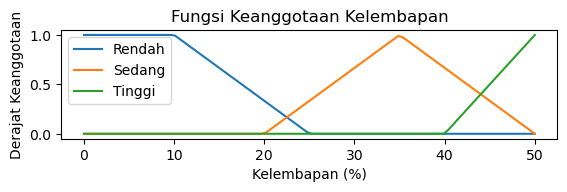

In [82]:
plt.subplot(3, 1, 2)
plt.plot(x_kelembapan, rendah(x_kelembapan), label="Rendah")
plt.plot(x_kelembapan, sedang_kelembapan(x_kelembapan), label="Sedang")
plt.plot(x_kelembapan, tinggi(x_kelembapan), label="Tinggi")
plt.title("Fungsi Keanggotaan Kelembapan")
plt.xlabel("Kelembapan (%)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()

Kecepatan Kipas

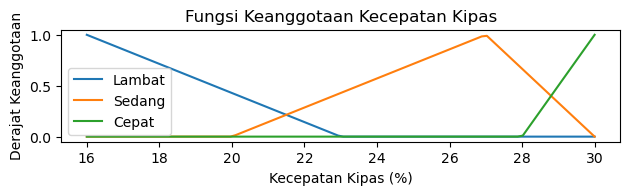

In [84]:
plt.subplot(3, 1, 3)
plt.plot(x_kecepatan, lambat(x_kecepatan), label="Lambat")
plt.plot(x_kecepatan, sedang_kipas(x_kecepatan), label="Sedang")
plt.plot(x_kecepatan, cepat(x_kecepatan), label="Cepat")
plt.title("Fungsi Keanggotaan Kecepatan Kipas")
plt.xlabel("Kecepatan Kipas (%)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()

plt.tight_layout()
plt.show()

Aturan Fuzzy (Fuzzy Rules)

In [86]:
def fuzzy_rules(suhu, kelembapan):
    # Fuzzifikasi input
    dingin_val = dingin(suhu)
    sedang_suhu_val = sedang_suhu(suhu)
    panas_val = panas(suhu)
    
    rendah_val = rendah(kelembapan)
    sedang_kelembapan_val = sedang_kelembapan(kelembapan)
    tinggi_val = tinggi(kelembapan)
    
    # Inferensi
    lambat_rule = np.fmin(dingin_val, rendah_val)
    sedang_rule = np.fmin(sedang_suhu_val, sedang_kelembapan_val)
    cepat_rule = np.fmax(panas_val, tinggi_val)
    
    return lambat_rule, sedang_rule, cepat_rule

Inferensi dan Defuzzifikasi

In [92]:
def defuzzifikasi(suhu, kelembapan):
    lambat_rule, sedang_rule, cepat_rule = fuzzy_rules(suhu, kelembapan)
    
    # Output fuzzy
    lambat_output = np.fmin(lambat_rule, lambat(x_kecepatan))
    sedang_output = np.fmin(sedang_rule, sedang_kipas(x_kecepatan))
    cepat_output = np.fmin(cepat_rule, cepat(x_kecepatan))
    
    # Gabungkan semua output
    aggregated = np.fmax(lambat_output, np.fmax(sedang_output, cepat_output))
    
    # Defuzzifikasi (Centroid)
    return np.sum(aggregated * x_kecepatan) / np.sum(aggregated)

Contoh Penghitungan

In [95]:
suhu_input = 24  # Contoh suhu ruangan
kelembapan_input = 30  # Contoh kelembapan
output_kecepatan = defuzzifikasi(suhu_input, kelembapan_input)

In [97]:
print(f"Kecepatan kipas yang disarankan untuk suhu {suhu_input}°C dan kelembapan {kelembapan_input}% adalah {output_kecepatan:.2f}%")

Kecepatan kipas yang disarankan untuk suhu 24°C dan kelembapan 30% adalah 25.56%
